# Intro to Stats I - Predict Titanic Survivors

The aim is to use random simulation to see if a variable has statistical significance

## Import raw data in csv

In [27]:
import pandas as pd
import random
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

titanic_df = pd.read_csv('../datasets/titanic.csv')
titanic_df.iloc[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
def get_sex_survival_rate(df):
    female_df = df[df['Sex'] == 'female']
    male_df = df[df['Sex'] == 'male']
    total_female = len(female_df)
    total_male = len(male_df)
    total_count = len(df)
    female_survival_rate = len(female_df[female_df['Survived'] == 1]) / total_female
    male_survival_rate = len(male_df[male_df['Survived'] == 1]) / total_male
    return female_survival_rate, male_survival_rate

total_count = len(titanic_df)
total_female = len(titanic_df[titanic_df.Sex == 'female'])
total_male = len(titanic_df[titanic_df.Sex == 'male'])
print('Total count - {}, Female - {}, Male - {}'.format(total_count, total_female, total_male))
get_sex_survival_rate(titanic_df)

Total count - 891, Female - 314, Male - 577


(0.7420382165605095, 0.18890814558058924)

# Hypothesis

Null Hypothesis: **High female survival rate is purely due to chance**

Randomly assign survival rates to people and see the stats generated by random survival rate

In [29]:
iterations = 1000

simulation_result = []
test_df = titanic_df.copy(deep=True)
for i in range(iterations):
    survived = [1 if random.random() > 0.5 else 0 for x in range(total_count)]
    test_df['Survived'] = pd.DataFrame(survived)
    rates = get_sex_survival_rate(test_df)
    simulation_result.append(rates)

sim_df = pd.DataFrame(simulation_result, columns=['F survival', 'M survival'])
sim_df.describe()

,F survival,M survival
count,1000.000000,1000.000000
mean,0.499296,0.500901
std,0.027088,0.020596
min,0.414013,0.440208
25%,0.480892,0.487002
50%,0.500000,0.500867
75%,0.519108,0.514731
max,0.598726,0.570191


In [30]:
f_sample_test = stats.ttest_1samp(sim_df['F survival'], 0.742).pvalue
m_sample_test = stats.ttest_1samp(sim_df['M survival'], 0.1889).pvalue
print('The chance of 74.2% female will survive at random is {:.2f}%'.format(f_sample_test * 100))
print('The chance of 18.89% male will survive at random is {:.2f}%'.format(m_sample_test * 100))

The chance of 74.2% female will survive at random is 0.00%
The chance of 18.89% male will survive at random is 0.00%


Text(0,0.5,'Female Survival')

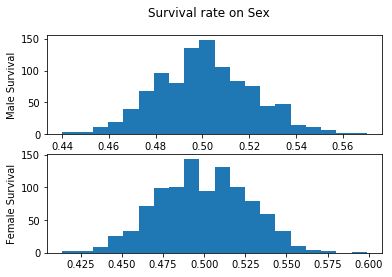

In [31]:
f, ax = plt.subplots(2, 1)
f.suptitle('Survival rate on Sex')
ax[0].hist(sim_df['M survival'], bins=20)
ax[0].set_ylabel('Male Survival')
ax[1].hist(sim_df['F survival'], bins=20)
ax[1].set_ylabel('Female Survival')

(array([  2.,  16.,  43., 105., 223., 239., 216., 108.,  40.,   8.]),
 array([-0.12062723, -0.0987918 , -0.07695636, -0.05512093, -0.0332855 ,
        -0.01145007,  0.01038537,  0.0322208 ,  0.05405623,  0.07589166,
         0.0977271 ]),
 <a list of 10 Patch objects>)

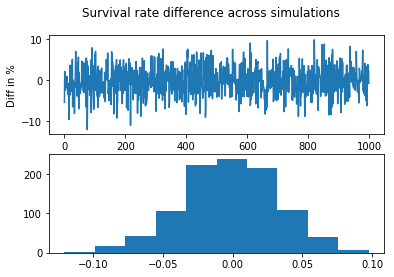

In [32]:
f, ax = plt.subplots(2, 1)
f.suptitle('Survival rate difference across simulations')
diff_in_survival = (sim_df['F survival'] - sim_df['M survival'])
ax[0].plot(diff_in_survival * 100)
ax[0].set_ylabel('Diff in %')
ax[1].hist(diff_in_survival)

In [33]:
diff_in_survival.describe()

count    1000.000000
mean       -0.001605
std         0.034044
min        -0.120627
25%        -0.024670
50%        -0.001148
75%         0.020841
max         0.097727
dtype: float64

Difference in survial rate between male and female during simulation has a std of 3.57%. Even with 3*std, the difference between survival rate should be around 10%. However the actual survial rate were 74.2% and 18.89%, a gap that is much bigger than 10%. As the p-value shows, the chance of this happening at random is 0.0%

# Test other parameters

In [34]:
titanic_df[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Hypothesis on Age

See whether the babies are indeed had a higher survial rate than randomness suggest

Null hypothesis: ** Survival rate for age group between 0 and 5 has an average survial rate **

(array([27., 11.,  7., 34., 39., 38., 40., 33., 18., 16., 14.,  6.,  6.,
         0.,  0.,  0.,  1.,  0.,  0.]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
        85, 90, 95]),
 <a list of 19 Patch objects>)

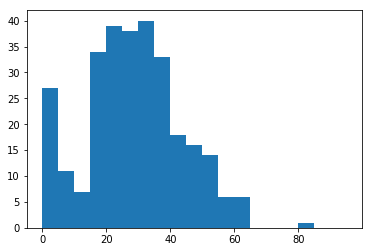

In [39]:
age_df = titanic_df[['Age', 'Survived']]
age_df = age_df[[~np.isnan(x) for x in age_df['Age']]]
survived_age_df = age_df[age_df['Survived'] == 1]

age_buckets = [x for x in range(0, 100, 5)]

plt.hist(survived_age_df['Age'], bins=age_buckets)

Based on the distribution chart, it does seem to indicate that babies has a higher survival number. Investigate the actual survival rate for each age bucket next.

<BarContainer object of 19 artists>

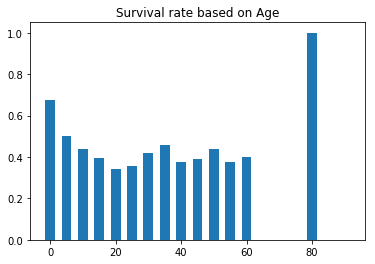

In [40]:
def get_age_survival_rate(df, buckets):
    survival_list = []
    for i in range(len(buckets) - 1):
        age_min = buckets[i]
        age_max = buckets[i+1]
        bucket_df = df[age_min <= df['Age']]
        bucket_df = bucket_df[bucket_df['Age'] < age_max]
        bucket_total = len(bucket_df)
        bucket_survived = len(bucket_df[bucket_df['Survived'] == 1])
        if bucket_total == 0:
            survive_rate = 0
        else:
            survive_rate = bucket_survived / bucket_total
        survival_list.append(survive_rate)
    return survival_list

age_survival_rate = get_age_survival_rate(age_df, age_buckets)

f, ax = plt.subplots(1, 1)
ax.set_title('Survival rate based on Age')
ax.bar(x=age_buckets[:-1], height=age_survival_rate, width=3)

Run random simulation and determine whether the survival rate for age group 0-5 is caused by randomness.

In [41]:
iterations = 100

simulation_result = []
test_df = age_df.copy(deep=True)
for i in range(iterations):
    survived = [1 if random.random() > 0.5 else 0 for x in range(total_count)]
    test_df['Survived'] = pd.DataFrame(survived)
    rates = get_age_survival_rate(test_df, age_buckets)
    simulation_result.append(rates)

labels = []
for i in range(len(age_buckets)-1):
    labels.append('{}-{}'.format(age_buckets[i], age_buckets[i+1]))
sim_df = pd.DataFrame(simulation_result, columns=labels)
sim_df.describe()

,0-5,5-10,10-15,15-20,20-25,25-30,30-35,35-40,40-45,45-50,50-55,55-60,60-65,65-70,70-75,75-80,80-85,85-90,90-95
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.0,100.0
mean,0.507000,0.494545,0.527500,0.502093,0.503684,0.506226,0.499158,0.505278,0.502083,0.502195,0.495937,0.519375,0.499333,0.507500,0.503333,0.0,0.480000,0.0,0.0
std,0.075301,0.105820,0.117623,0.050520,0.048259,0.044718,0.053948,0.055863,0.067815,0.073873,0.087113,0.120072,0.129402,0.266986,0.215791,0.0,0.502117,0.0,0.0
min,0.325000,0.227273,0.250000,0.383721,0.342105,0.396226,0.368421,0.333333,0.333333,0.341463,0.312500,0.250000,0.133333,0.000000,0.000000,0.0,0.000000,0.0,0.0
25%,0.450000,0.409091,0.437500,0.476744,0.473684,0.471698,0.452632,0.458333,0.458333,0.463415,0.437500,0.437500,0.400000,0.250000,0.333333,0.0,0.000000,0.0,0.0
50%,0.500000,0.500000,0.562500,0.500000,0.500000,0.504717,0.505263,0.506944,0.500000,0.512195,0.484375,0.500000,0.533333,0.500000,0.500000,0.0,0.000000,0.0,0.0
75%,0.556250,0.590909,0.625000,0.534884,0.537281,0.540094,0.536842,0.555556,0.541667,0.560976,0.562500,0.625000,0.600000,0.750000,0.666667,0.0,1.000000,0.0,0.0
max,0.725000,0.727273,0.812500,0.616279,0.587719,0.622642,0.631579,0.694444,0.645833,0.707317,0.687500,0.750000,0.733333,1.000000,1.000000,0.0,1.000000,0.0,0.0


In [42]:
rates = get_age_survival_rate(age_df, age_buckets)
for l, r in zip(labels, rates):
    if sim_df[l].std() == 0:
        continue
    delta_from_mean = abs(r - sim_df[l].mean()) / sim_df[l].std()
    sample_test = 1 - stats.norm.cdf(delta_from_mean)
    print('The chance of {:.2f}% aged {} will survive at random is {:.2f}%'.format(r * 100, l, sample_test * 100))

The chance of 67.50% aged 0-5 will survive at random is 1.28%
The chance of 50.00% aged 5-10 will survive at random is 47.94%
The chance of 43.75% aged 10-15 will survive at random is 22.21%
The chance of 39.53% aged 15-20 will survive at random is 1.73%
The chance of 34.21% aged 20-25 will survive at random is 0.04%
The chance of 35.85% aged 25-30 will survive at random is 0.05%
The chance of 42.11% aged 30-35 will survive at random is 7.38%
The chance of 45.83% aged 35-40 will survive at random is 20.04%
The chance of 37.50% aged 40-45 will survive at random is 3.05%
The chance of 39.02% aged 45-50 will survive at random is 6.48%
The chance of 43.75% aged 50-55 will survive at random is 25.12%
The chance of 37.50% aged 55-60 will survive at random is 11.46%
The chance of 40.00% aged 60-65 will survive at random is 22.14%
The chance of 0.00% aged 65-70 will survive at random is 2.87%
The chance of 0.00% aged 70-75 will survive at random is 0.98%
The chance of 100.00% aged 80-85 will s